In [1]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from minima_volume.analysis_funcs import (  grab_folder_names,
                                            load_base_train_size,
                                            list_additional_data,
                                            load_param_num,
                                            multiple_minima_fixed_landscape,
                                            fixed_landscape_minima_labels,
                                            plot_fixed_landscape_minima_pair,
                                            model_volume_across_targets,
                                            append_cutoff_points,
                                            varying_landscape_minima_labels,
                                            plot_minima_volume_vs_data_level,                    
)

problem_name = "MNIST"

loss_value = .1  # Loss value to analyze
data_level_log = False #Is the data log distributed?
base_output_dir = "analysis"  # Root folder to save all plots
os.makedirs(base_output_dir, exist_ok=True)

# Data for the loss landscape levels
experiment_folders, data_modifications = grab_folder_names()
data_modifications = ['data_0']

base_train_size = load_base_train_size(experiment_folders[0])
model_data_sizes = list_additional_data(experiment_folders[0])
num_params = load_param_num(experiment_folders[0], data_modifications[0], loss_value = loss_value)

base_shift = 0
if data_modifications[0].startswith("data_"):
    base_shift = base_train_size  # Shift to reflect true dataset size

print("Experiment folders: ", experiment_folders)
print("Different data levels where loss landscapes were computed:", data_modifications)
print("The base train size is: ", base_train_size)
print("Data levels where models were trained: ", model_data_sizes)
print("The number of model parameters is ", num_params)

First entry: Model_0, base_train_size = 800
Experiment folders:  ['model_40_data_10', 'model_0_data_10', 'model_22_data_10', 'model_32_data_10', 'model_14_data_10', 'model_49_data_10', 'model_9_data_10', 'model_15_data_10', 'model_8_data_10', 'model_48_data_10', 'model_1_data_10', 'model_41_data_10', 'model_33_data_10', 'model_23_data_10', 'model_17_data_10', 'model_38_data_10', 'model_28_data_10', 'model_21_data_10', 'model_31_data_10', 'model_3_data_10', 'model_43_data_10', 'model_30_data_10', 'model_20_data_10', 'model_42_data_10', 'model_2_data_10', 'model_16_data_10', 'model_29_data_10', 'model_39_data_10', 'model_13_data_10', 'model_25_data_10', 'model_35_data_10', 'model_47_data_10', 'model_7_data_10', 'model_34_data_10', 'model_24_data_10', 'model_6_data_10', 'model_46_data_10', 'model_12_data_10', 'model_4_data_10', 'model_44_data_10', 'model_26_data_10', 'model_36_data_10', 'model_19_data_10', 'model_10_data_10', 'model_11_data_10', 'model_45_data_10', 'model_5_data_10', 'mod

In [2]:
# Preparation for the specific plots
import matplotlib as mpl

#cmap = mpl.colormaps.get_cmap("winter")  # blue → green
#background_colors = [cmap(i) for i in np.linspace(0, 1, 10)]

#natural_label = "Minima (On Base Dataset)"
other_label = "Minima (Larger Datasets)"

In [3]:
for data_modification in data_modifications:
    print(f"\nProcessing data modification folder: {data_modification}")

    # Create output folder for this data_modification
    save_dir = os.path.join(base_output_dir, data_modification)
    os.makedirs(save_dir, exist_ok=True)

    # Get axis labels and titles
    labels = fixed_landscape_minima_labels(data_modification, base_train_size)

    # Extract minima landscapes
    all_mdl, all_log_rn, all_test_loss, all_test_acc = multiple_minima_fixed_landscape(
        experiment_folders, data_modification, loss_value #mdl is modification data level
    )
    print(all_log_rn)
    print(all_test_acc)


Processing data modification folder: data_0
[[6363.635969992523], [6086.361839625548], [4514.083418638997], [2308.1210389480348], [4410.890392477586], [6154.882451988903], [6176.996186250146], [3105.087562479215], [5777.042569965136], [5161.003192033628], [3719.4687099139574], [5139.967781025701], [4665.315727500219], [5984.599129228801], [5144.593506697918], [5845.458953477619], [4005.4424823614195], [4293.481114707961], [4469.309122286803], [4876.712208246591], [4638.369337939495], [5944.797744915828], [6934.973281168093], [5348.796876898552], [4732.3630920997075], [3991.553353660689], [2887.126199096925], [4366.817118676444], [4491.090764797328], [4520.067151591048], [4567.51835416751], [6409.633182649554], [6604.5903415623625], [4310.320539681837], [5726.082689638437], [4409.598531546391], [6657.909870776177], [4778.048280636212], [4220.568330589951], [4557.666301030545], [5037.932470105016], [6141.8775683663025], [5638.308921480476], [5207.2078955919405], [4032.123823212181], [39

In [4]:
all_log_rn_list = [val for sublist in all_log_rn for val in sublist]
all_test_acc_list = [val for sublist in all_test_acc for val in sublist]

print(all_log_rn_list)
print(all_test_acc_list)

[6363.635969992523, 6086.361839625548, 4514.083418638997, 2308.1210389480348, 4410.890392477586, 6154.882451988903, 6176.996186250146, 3105.087562479215, 5777.042569965136, 5161.003192033628, 3719.4687099139574, 5139.967781025701, 4665.315727500219, 5984.599129228801, 5144.593506697918, 5845.458953477619, 4005.4424823614195, 4293.481114707961, 4469.309122286803, 4876.712208246591, 4638.369337939495, 5944.797744915828, 6934.973281168093, 5348.796876898552, 4732.3630920997075, 3991.553353660689, 2887.126199096925, 4366.817118676444, 4491.090764797328, 4520.067151591048, 4567.51835416751, 6409.633182649554, 6604.5903415623625, 4310.320539681837, 5726.082689638437, 4409.598531546391, 6657.909870776177, 4778.048280636212, 4220.568330589951, 4557.666301030545, 5037.932470105016, 6141.8775683663025, 5638.308921480476, 5207.2078955919405, 4032.123823212181, 3901.5141849052607, 3909.96413932804, 5691.097338424287, 4820.016293596587, 4625.1649875360135]
[0.9975, 0.9975, 0.9985, 0.9985, 0.999, 0.

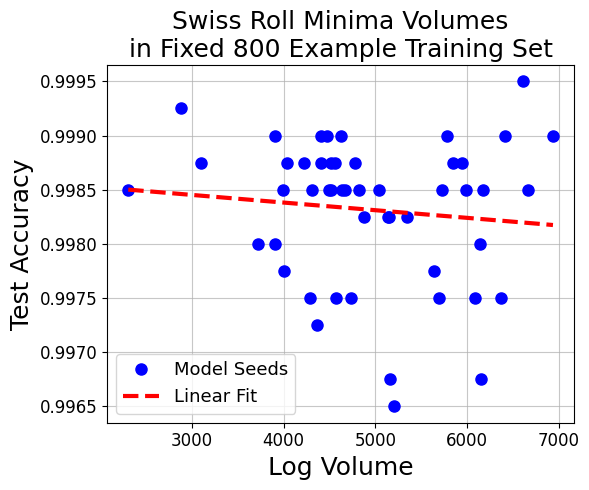

In [5]:
from minima_volume.volume_funcs import plot_pair_metrics


plot_pair_metrics(
    # metric1_values=all_test_loss_list,
    metric1_values=all_log_rn_list,
    metric2_values=all_test_acc_list,
    # metric2_values=all_log_rn_list,
    # xlabel="Test Loss",
    xlabel="Log Volume",
    ylabel="Test Accuracy",
    # ylabel="Log Volume",
    title="Swiss Roll Minima Volumes\nin Fixed 800 Example Training Set",
    display=True,
    connect_dots=False,
    label='Model Seeds',
    show_best_fit=True,
    xlabel_size=18, ylabel_size=18, title_size=18, legend_size = 13,
    alpha=0.7
)